## LH007 🟢 PySpark Drills 1: Dataframes

>  **Note**: this tutorial is provided for educational purposes, for members of the [Fabric Dojo community](https://skool.com). All content contained within is protected by Copyright © law. Do not copy or re-distribute. 

Welcome to the first of five drill-style tutorials. The goal of this mini-series is to expose you to a wide variety of commonly used PySpark functions. 

In this first tutorial in the mini-series, we will look at a wide variety of basic utilities and ways of working with Spark dataframes. 

#### Format
You will be presented with a number of 'drills'. Each follows a similar structure. 
1. Task (& hint) 
2. Desired state/ result

You'll be given an empty code cell to write the code for each drill. Try to complete each drill without the use of the walkthrough video, but it's there if you need it! 

#### Prerequisites
1. Create a new Lakehouse in your Fabric Workspace, called LH007_PropertyLH - we're going to be working with some property sales data. 
2. You should have loaded this notebook into your Fabric Workspace. Connect this notebook to the LH007_PropertyLH Lakehouse. 
3. Download the `property_sales.csv` starter file from the Skool page for LH007. Upload the file into the LH007_PropertyLH Files area. 

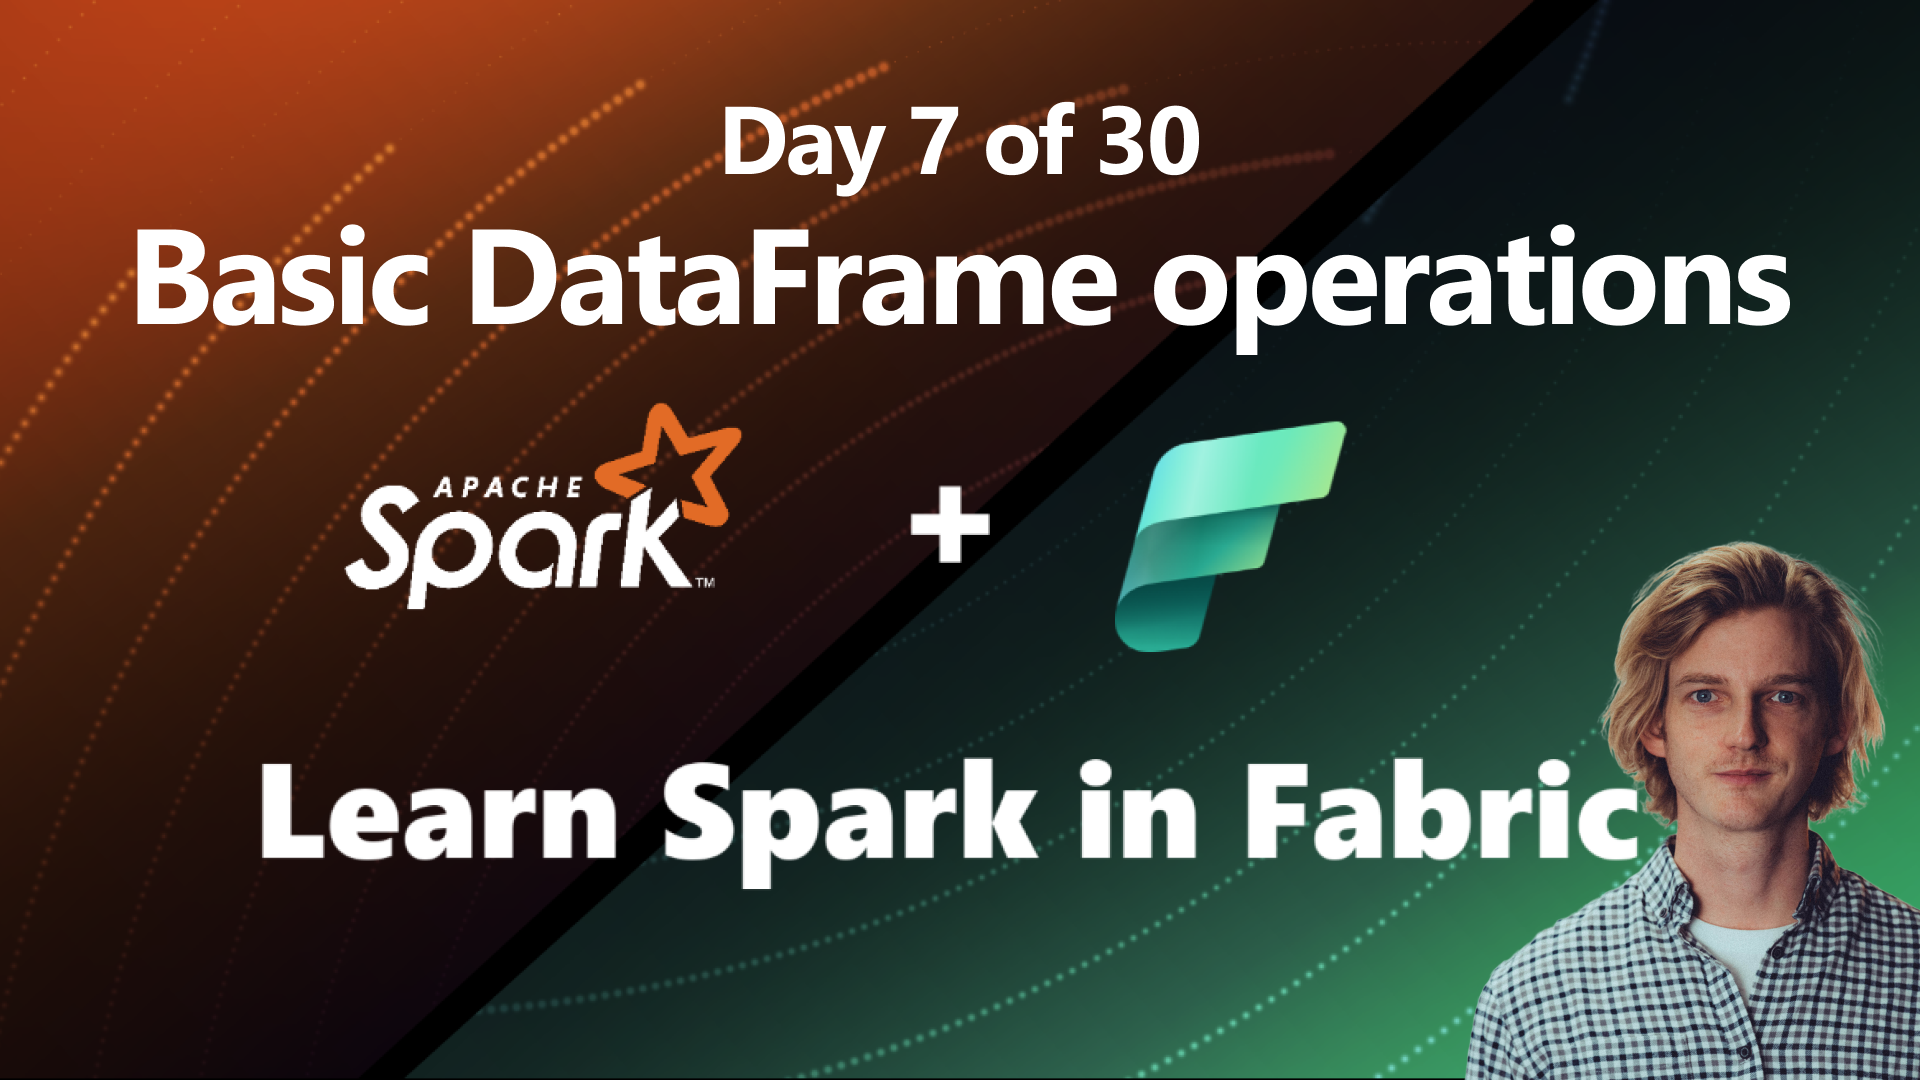

#### Drill 1.1: Loading data into a Spark dataframe

Using [spark.read()](https://spark.apache.org/docs/3.5.2/sql-data-sources-csv.html), **read the contents of the `property-sales.csv` file into a Spark dataframe, assign this to a variable called `property_sales_df`.**  



In [ ]:
# First we need a DataFrame to look at! 
property_sales_df = spark.read.csv('Files/property-sales.csv', header=True, inferSchema=True)

display(property_sales_df)


#### Drill 1.2: Ways to visualize a dataframe

Now, you should have your data loaded into a Spark dataframe `property_sales_df` - now let's look at ways of seeing what this dataframe contains.

Using [df.show()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.show.html) - **show a printed representation of the data in the dataframe:**


In [ ]:
# show a printed representation of the DataFrame
property_sales_df.show()

Using [display(df)](https://learn.microsoft.com/en-us/fabric/data-engineering/notebook-visualization#built-in-visualization-command----display-function), **get an interactive view of the Dataframe:**

In [ ]:
# interactive view of the DataFrame
display(property_sales_df) 

Use [display(df)](https://learn.microsoft.com/en-us/fabric/data-engineering/notebook-visualization#built-in-visualization-command----display-function) again, but this time, **also use [df.head(x)](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.head.html) to only display the top 2 records in the Dataframe:**

In [ ]:
# Display just the first two rows of my DataFrame
display(property_sales_df.head(2))

#### Drill 1.3: Exploring schemas

Using [df.printSchema()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.printSchema.html), **print a copy of the schema of the `property_sales_df` dataframe:** 

In [ ]:
# printing the schema of a dataframe
property_sales_df.printSchema()

Python is an object-oriented programming language. That means that everything in Python is an object, including our `property_sales_df`. An object has both attributes (like properties of that object), and methods (functions that the object can perform). 

Imagine our object was a car. 

The car might have the following attributes: 
- car.weight_kg = 453
- car.height_m = 1.5

The car might have the following methods (doing words/ actions): 

- car.accelerate() 
- car.brake() 

Now, bringing it back to our example, the Spark dataframe, it has a number of methods (i.e. actions/ doing words), these use the two brackets, for example, `df.printSchema()` is a method of the `df` object. 

But, the Spark dataframe also has a number of attributes. These can be queried to give us useful information (properties) about the dataframe. To query an attribute of an object in Python, simply call df.attribute_name (without the brackets, and obviously substituting attribute_name for the actual attribute name). 

**Query the [dtypes](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.dtypes.html) attribute of your Spark dataframe, to show the data types for each of the columns in your dataframe:** 



In [ ]:
# get just the data types (not full schema)
property_sales_df.dtypes

**Query the [schema](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.schema.html) attribute of your Spark dataframe - to show the schema:** 

In [ ]:
# the actual schema can be accessed using df.schema 
property_sales_df.schema

Accessing the schema of a dataframe like this is useful, because sometimes we might want to do something like this: (using the schema of one dataframe when loading or writing another): 


In [ ]:
# extract the schmema 
source_schema = property_sales_df.schema

# this saves us having to explicitly write out our the schema for a new df, if we have one that already exists. 
new_df_with_existing_schema = (
    spark.read.csv(path="Files/property-sales.csv",  schema=source_schema)
)

**Query the [columns](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.columns.html) attribute of your Spark dataframe - to show the columns:** 

In [ ]:
# query the columns attribute of your dataframe 
property_sales_df.columns

#### Drill 1.4: Column operations

Using [df.select()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.select.html), **select just the 'Type' column of your `property_sales_df` dataframe. Display the result using df.show():** 

_Note: you can also pass in a list [] to select multiple columns_

In [ ]:
#selecting just a single column 
property_sales_df.select('Type').show()

After running `property_sales_df.columns`, you notice a data quality issue with the naming of the 'Addresses ' column (a trailing space). 

Using [df.withColumnRenamed()](), **rename this column to remove the trailing space. Assign this new dataframe  Then use property_sales_df.select('Address').show() to visualize the new column:** 

_Note: you can also use [df.withColumnsRenamed()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumnsRenamed.html) to rename multiple columns at the same time_ 

In [ ]:
#renaming existing columns 
property_sales_df_updated = property_sales_df.withColumnRenamed('Address ', 'Address')
property_sales_df_updated.select('Address').show()

#### Drill 4: Adding new columns to your dataframe

Using [df.withColumn()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.withColumn.html), **add a new column to your property_sales_df_updated dataframe, which represents 10% of the 'SalePrice ($)' column.** 

The column should be named DepositAmount (as it represents the deposit amount paid for this property, all of them are 10%):

In [ ]:
property_sales_df_updated = property_sales_df_updated.withColumn('DepositAmount', property_sales_df_updated['SalePrice ($)'] * 0.1)
property_sales_df_updated.show()

Using [df.drop()](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.drop.html), **drop the DepositAmount column from your dataframe:** 


In [ ]:
property_sales_df_updated = property_sales_df_updated.drop('DepositAmount')
property_sales_df_updated.show()